<ipython-input-21-88d25c92ad33>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
<ipython-input-21-88d25c92ad33>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]])


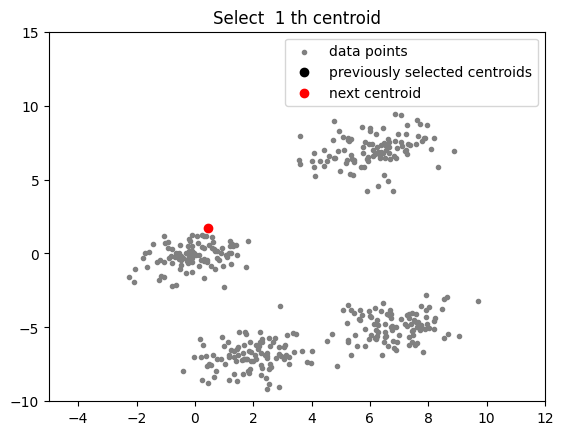

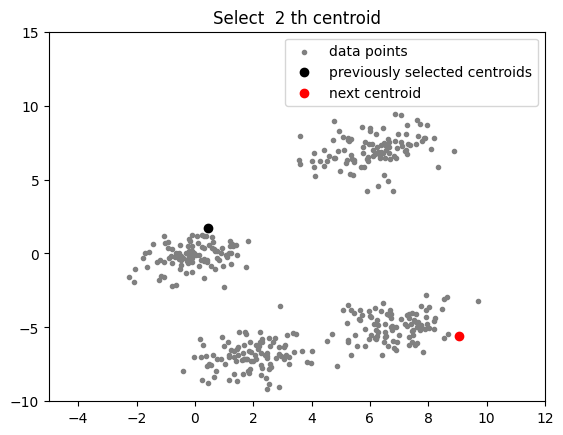

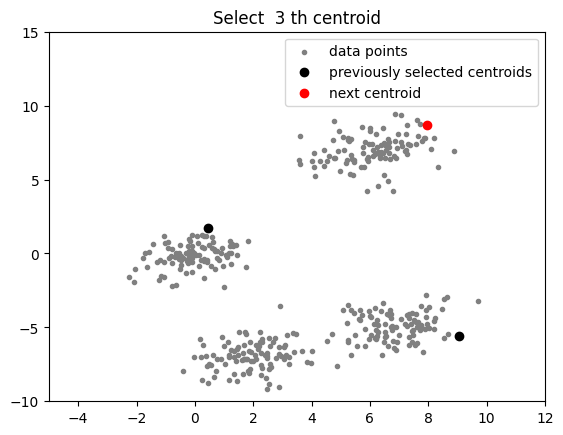

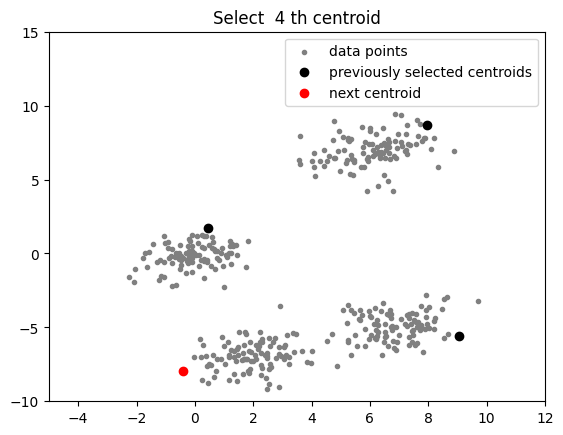

In [ ]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# creating data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

# function to plot the selected centroids
def plot(data, centroids):
	plt.scatter(data[:, 0], data[:, 1], marker = '.',
				color = 'gray', label = 'data points')
	plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
				color = 'black', label = 'previously selected centroids')
	plt.scatter(centroids[-1, 0], centroids[-1, 1],
				color = 'red', label = 'next centroid')
	plt.title('Select % d th centroid'%(centroids.shape[0]))

	plt.legend()
	plt.xlim(-5, 12)
	plt.ylim(-10, 15)
	plt.show()

# function to compute euclidean distance
def distance(p1, p2):
	return np.sum((p1 - p2)**2)

# initialization algorithm
def initialize(data, k):
	'''
	initialized the centroids for K-means++
	inputs:
		data - numpy array of data points having shape (200, 2)
		k - number of clusters
	'''
	## initialize the centroids list and add
	## a randomly selected data point to the list
	centroids = []
	centroids.append(data[np.random.randint(
			data.shape[0]), :])
	plot(data, np.array(centroids))

	## compute remaining k - 1 centroids
	for c_id in range(k - 1):

		## initialize a list to store distances of data
		## points from nearest centroid
		dist = []
		for i in range(data.shape[0]):
			point = data[i, :]
			d = sys.maxsize

			## compute distance of 'point' from each of the previously
			## selected centroid and store the minimum distance
			for j in range(len(centroids)):
				temp_dist = distance(point, centroids[j])
				d = min(d, temp_dist)
			dist.append(d)

		## select data point with maximum distance as our next centroid
		dist = np.array(dist)
		next_centroid = data[np.argmax(dist), :]
		centroids.append(next_centroid)
		dist = []
		plot(data, np.array(centroids))
	return centroids

# call the initialize function to get the centroids
centroids = initialize(data, k = 4)
